In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn import under_sampling , over_sampling
from sklearn.model_selection import train_test_split
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv('loan_data.csv')

In [3]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
len(data)

9578

In [5]:
data.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [6]:
data['installment'].max()

940.14

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
data['int.rate'].max()

0.2164

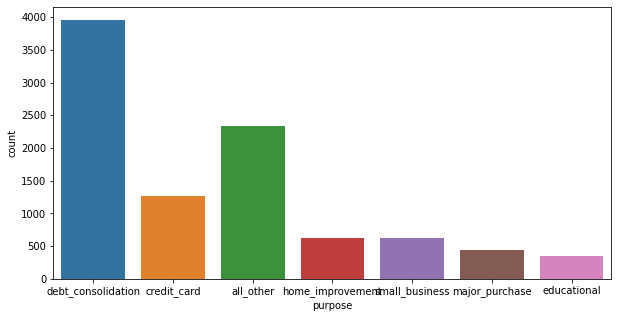

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='purpose')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f640eb60b10>,
      dtype=object)

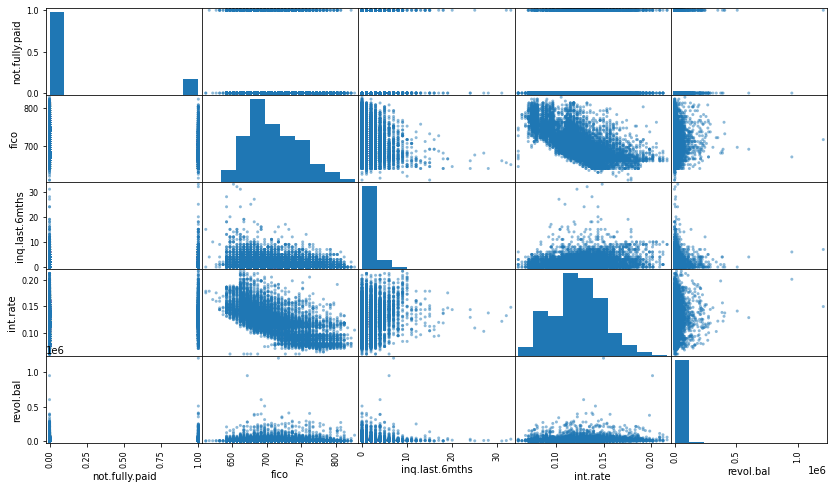

In [13]:
from pandas.plotting import scatter_matrix
attributes = ["not.fully.paid","fico", "inq.last.6mths", "int.rate","revol.bal"]
scatter_matrix(data[attributes], figsize=(14, 8))

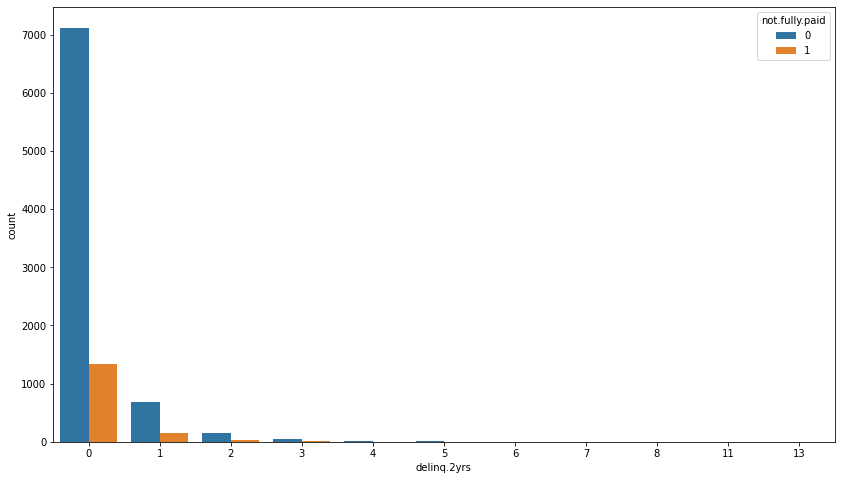

In [14]:
data.corr()['not.fully.paid'].sort_values(ascending = False)

plt.figure(figsize=(14,8))
sns.countplot(data=data, x='delinq.2yrs' ,hue="not.fully.paid")

In [15]:
from imblearn.over_sampling import RandomOverSampler

mydata = data
ros = RandomOverSampler(sampling_strategy=1)
x = mydata.drop('not.fully.paid',axis =1)
y = mydata['not.fully.paid']

x_ros , y_ros = ros.fit_resample(x,y)

targetdata = pd.DataFrame(y_ros,columns=['not.fully.paid'])
x_ros = pd.DataFrame(x_ros,columns=x.columns)
finaldata = pd.concat([x_ros,targetdata],axis=1)
x_ros

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,829.1,11.3504,19.48,737,5639.96,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.0821,14.29,707,2760,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.3735,11.63,682,4710,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.3504,8.1,712,2699.96,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.2997,14.97,667,4066,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16085,1,all_other,0.1221,333.15,11.4296,10.45,702,3419.96,17328,45.7,0,0,0
16086,1,all_other,0.1001,216.23,10.5966,5.13,717,6300,4225,28.9,3,0,1
16087,1,small_business,0.2017,186.26,10.8198,6,672,5009.96,9814,59.5,1,0,1
16088,1,all_other,0.1379,340.76,10.3736,15.49,677,2339.96,15968,47.8,3,0,0
